# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Khusnil Arifandi Purnama
- **Email:** khusnilarifandipurnamaaa@gmail.com
- **ID Dicoding:** MC002D5Y0474

## Menentukan Pertanyaan Bisnis


*  Bagaimana distribusi pelanggan berdasarkan wilayah?
*  Bagaimana tren jumlah pesanan dari waktu ke waktu dan berdasarkan 5 kota terbesar?
*  Bagaiaman tren revenue dari waktu ke waktu dan berdasarkan 5 kota terbesar?
* Metode pembayaran yang paling di pakai pelanggan?
* Product apa yang paling laku?
* Bagaimana distribusi total revenue berdasarkan kategori product?
* Bagaimana performa seller?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("data/customers_dataset.csv")
print("Customers_dataset")
customers_df.head()

Customers_dataset


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
print("Geolocation_dataset")
geolocation_df.head()

Geolocation_dataset


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
print("Order_items_dataset")
order_items_df.head()

Order_items_dataset


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
print("Order_payments_dataset")
order_payments_df.head()

Order_payments_dataset


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
print("Order_reviews_dataset")
order_reviews_df.head()

Order_reviews_dataset


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv("data/orders_dataset.csv")
print("orders_dataset")
orders_df.head()

orders_dataset


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
print("product_category_name_translation_dataset")
product_category_name_translation_df.head()

product_category_name_translation_dataset


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv("data/products_dataset.csv")
print("products_dataset")
products_df.head()

products_dataset


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
print("sellers_dataset")
sellers_df.head()

sellers_dataset


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

***Assesing data customers_df***

In [ ]:
customers_df.info()
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi:", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi: 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


***Assesing data geolocation_df***

In [ ]:
geolocation_df.info()
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
print("Jumlah duplikasi:", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi: 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


***Assesing data order_items_df***

In [ ]:
order_items_df.info()
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi:", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi: 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


***Assesing order_payments_df***

In [ ]:
order_payments_df.info()
order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print("Jumlah duplikasi:", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi: 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


***Assesing order_reviews_df***

In [ ]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi:", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi: 0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


***Assesing orders_df***

In [ ]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print("Jumlah duplikasi:", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi: 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


***Assesing product_category_name_translation_df***

In [ ]:
product_category_name_translation_df.info()
product_category_name_translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [ ]:
print("Jumlah duplikasi:", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi: 0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


***Assesing products_df***

In [ ]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi:", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi: 0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


***Assesing sellers_df***

In [ ]:
sellers_df.info()
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print("Jumlah duplikasi:", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi: 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

***Cleaning customers_df***

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:

customers_df["customer_zip_code_prefix"] = customers_df["customer_zip_code_prefix"].astype(str)

In [ ]:
customers_df["customer_zip_code_prefix"] = customers_df["customer_zip_code_prefix"].str.zfill(5)



**Insight:**
- Mengubah type data kolom customer_zip_code_prefix menjadi string karena merupakan kode pos yang unik dan bukan data numerik yang harus dihitung

***Cleaning geolocation_df***

In [ ]:
geolocation_df["geolocation_zip_code_prefix"] = geolocation_df["geolocation_zip_code_prefix"].astype(str)
geolocation_df["geolocation_zip_code_prefix"] = geolocation_df["geolocation_zip_code_prefix"].str.zfill(5)

**Insight:**
- Mengubah type data kolom geolocation_zip_code_prefix menjadi string karena merupakan kode pos yang unik dan bukan data numerik yang harus dihitung

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [ ]:
print(geolocation_df.duplicated().sum())

261831


**Insight:**
- Terdapat duplikasi data sebanyak 261831


In [ ]:
geolocation_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi:", geolocation_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight:**
- Data duplikat berhasil dibersihkan


***Cleaning order_items_df***



In [ ]:
datetime_order_items_columns = ["shipping_limit_date"]

for columns in datetime_order_items_columns:
  order_items_df[columns] = pd.to_datetime(order_items_df[columns])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- kolom shipping_limit_date pada data order_items_df type nya diubah menjadi datetime karena sebelumnya bertipe object


***Cleaning order_payments_df***



**Insight:**
- order_payments_df bersih


***Cleaning orders_df***

In [ ]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
status_to_remove = ["canceled", "created", "unavailable"]
orders_df = orders_df[~orders_df["order_status"].isin(status_to_remove)]
orders_df["order_status"].value_counts()

,count
order_status,
delivered,96478
shipped,1107
invoiced,314
processing,301
approved,2


**Insight:**
-Akan dihapus status_order "canceled", "created", "unavailable"

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,619
order_delivered_customer_date,1732
order_estimated_delivery_date,0


In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


In [ ]:
orders_df.loc[(orders_df["order_status"] == "delivered")& (orders_df["order_approved_at"].isna()), "order_approved_at"] = orders_df["order_purchase_timestamp"]

**Insight:**
- Ada missing value di order_approved_at dengan status "delivered", asumsikan data hilang karena kesalahan pencatatan, data akan diisi menggunakan order_purchase_timestamp


In [ ]:

datetime_orders_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for columns in datetime_orders_columns:
  orders_df[columns] = pd.to_datetime(orders_df[columns])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98202 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98202 non-null  object        
 1   customer_id                    98202 non-null  object        
 2   order_status                   98202 non-null  object        
 3   order_purchase_timestamp       98202 non-null  datetime64[ns]
 4   order_approved_at              98202 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98202 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 8.8+ MB


***Cleaning products_df***

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products_df[products_df.product_weight_g == products_df.product_weight_g.max()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0


In [ ]:
bed_bath_table_weights = products_df[products_df["product_category_name"] == "cama_mesa_banho"]["product_weight_g"]

print(bed_bath_table_weights.describe())


count     3029.000000
mean      2456.405084
std       3732.667484
min          0.000000
25%        700.000000
50%       1250.000000
75%       2300.000000
max      40425.000000
Name: product_weight_g, dtype: float64


In [ ]:
zero_weight_products = products_df[products_df["product_weight_g"] == 0]
print(zero_weight_products)


                             product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
9769                0.0               30.0               25.0   
13683               0.0               30.0               25.0   
14997               0.0               30.0               25.0   
32079               0.0

In [ ]:
median_weight_products_df = products_df.groupby("product_category_name")["product_weight_g"].median()
products_df.loc[products_df["product_weight_g"] == 0, "product_weight_g"] = products_df["product_category_name"].map(median_weight_products_df)


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.624237,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4281.980200,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Pada kolom product_weight_g terdapat nilai 0 dimana itu tidak mungkin, terdapat 4 data yang mempunyai berat 0. Pembersihan data dilakukan dengan mengganti nilai 0 dengan nilai median karena lebih baik dibanding mean karena tidak dipengaruhi outlier

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df = products_df.dropna(subset=["product_category_name"])

In [ ]:
products_df = products_df.dropna(subset=["product_width_cm"])

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- terdapat missing value di kolom product_category_name, karena hanya berisi 1,85% dari data keseluruhan, maka akan di hapus dengan dropna.

***Cleaning sellers_df***

In [ ]:
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].str.zfill(5)

**Insight:**
- mengubah type data dari kolom seller_zip_code_prefix dari integer menjadi string karena kode pos memiliki nilai unik dan bukan untuk operasi matematika


## Exploratory Data Analysis (EDA)

### Exploratory customers_df

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


**Insight:**
- Berdasarkan hasil diatas, dapat dilihat bahwa persebaran pelanggan paling tinggi di kota sau paulo yaitu sebanyak 15540

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Exploratory order_payments_df

In [ ]:
order_payments_df.groupby(by="payment_type").payment_value.sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [ ]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"],
    "payment_installments": ["max", "min"],
    "payment_sequential": ["max", "min"]
})

order_id payment_value                                 \
              nunique           max    min        mean         std   
payment_type                                                         
boleto          19784       7274.88  11.62  145.034435  213.581061   
credit_card     76505      13664.08   0.01  163.319021  222.119311   
debit_card       1528       4445.50  13.38  142.570170  245.793401   
not_defined         3          0.00   0.00    0.000000    0.000000   
voucher          3866       3184.34   0.00   65.703354  115.519185   

             payment_installments     payment_sequential      
                              max min                max min  
payment_type                                                  
boleto                          1   1                  2   1  
credit_card                    24   0                  3   1  
debit_card                      1   1                  3   1  
not_defined                     1   1                  1   1  
voucher                         1   1                 29   1

**Insight:**
- Berdasarkan pivot tavle diatas, dapat diketahui bahwa payment type di dominasi oleh payment credit_card dengan jumlah 76505 order_id. payment value dari credit card sendiri paling tinggi 13664

### Exploratory orders_df

In [ ]:
orders_df["actual_delivery_time"] = orders_df.apply(
    lambda x: (x["order_delivered_customer_date"] - x["order_purchase_timestamp"]).total_seconds() / 86400
    if pd.notna(x["order_delivered_customer_date"]) else None, axis=1
)

orders_df["estimated_delivery_time"] = orders_df.apply(
    lambda x: (x["order_estimated_delivery_date"] - x["order_purchase_timestamp"]).total_seconds() / 86400,
    axis=1
)

orders_df["actual_delivery_time"] = round(orders_df["actual_delivery_time"])
orders_df["estimated_delivery_time"] = round(orders_df["estimated_delivery_time"])

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,estimated_delivery_time
count,98202,98202,98202,98202,98202,97583,96470,98202,96470.000000,98202.000000
unique,98202,98202,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:42:11.984012800,2018-01-01 12:00:48.158387712,2018-01-04 21:46:36.917465344,2018-01-14 12:41:33.581683456,2018-01-24 20:20:33.506445824,12.517052,23.684161
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,2.000000
25%,NaN,NaN,NaN,2017-09-13 09:44:15.249999872,2017-09-13 17:57:46.750000128,2017-09-15 21:26:13,2017-09-25 22:15:09.500000,2017-10-04 00:00:00,7.000000,18.000000
50%,NaN,NaN,NaN,2018-01-19 17:13:34,2018-01-20 09:09:26,2018-01-24 13:48:56,2018-02-02 19:32:21,2018-02-15 00:00:00,10.000000,23.000000
75%,NaN,NaN,NaN,2018-05-04 21:04:54.249999872,2018-05-05 09:39:07.249999872,2018-05-08 13:50:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00,16.000000,28.000000
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,155.000000


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98202 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98202 non-null  object        
 1   customer_id                    98202 non-null  object        
 2   order_status                   98202 non-null  object        
 3   order_purchase_timestamp       98202 non-null  datetime64[ns]
 4   order_approved_at              98202 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98202 non-null  datetime64[ns]
 8   actual_delivery_time           96470 non-null  float64       
 9   estimated_delivery_time        98202 non-null  float64       
dtypes: datetime64[ns](5), float64(2), object(3)
memory usage: 10.3+ MB


**Insight:**
- Dibuat kolom baru yaitu actual_delivery_time dan estimated_delivery_time
-actual_delivery_time yaitu berapa lama waktu yang dibutuhkan product untuk benar benar sampai ditangan pelanggan (order_purchase_timestamp - order_delivered_customer_date)
- karena ada order yang masih dalam status "shipped" dll dimana product belum sampai di tangan pelanggan sehingga menghasilkan missing value di kolom order_delivered_customer_date, maka digunakan order_estimated_delivery_date untuk menghitung estimated_delivery_time (order_purchase_timestamp - order_estimated_delivery_date)
- berdasarkan hasil tersebut, dapat diketahui:
- rata rata waktu pengiriman = 12 hari (actual) dan 25 (estimated)
- maksimal waktu pengiriman = 210 hari (actual) dan 155 hari (estimated)

### Exploratory customers_df

In [ ]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
75206,7d76ebf018179f7d4c113d553ea71cc1,869aae302b28b65b5cc136f935089e42,88303,itajai,SC,Active
99236,c2732a928751eaab8cb1e80e6d0a05a1,e5f54c5adf3d924359f93f0285661e7b,82560,curitiba,PR,Active
65572,714f2635d40b3e5d19a2fac7552846f3,25e9454dd5930eccaa4f0e01ea3a7f49,82540,curitiba,PR,Active
93486,8a346ad0d2bed49dd45fc37b28d06f9f,164133bec0d572ddf77cd5dc7ab9c3c2,22060,rio de janeiro,RJ,Active
76013,ab37a169aa236ebab63bc925b4c0c723,bcde9c52cea2f09ded4c451c5306f99a,55580,sirinhaem,PE,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,98202
Non Active,1239


In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
84540,36db19001f33a6f23042adbc4a0e30a5,2421c7be6e7456c06f434ff26cb4223a,delivered,2017-08-28 23:02:43,2017-08-28 23:31:09,2017-08-30 17:17:52,2017-09-08 20:51:37,2017-09-19,11.0,21.0,75aa3869be687c067553853b124bbd2d,28024,campos dos goytacazes,RJ,Active
20783,0c325ea6925de749e1420be0cf43587c,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25,9.0,23.0,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP,Active
7294,1f92ee0cb5a486074e52ffcecaa1dbd0,e12c68dd4db32c03ad19a62b5c3da912,delivered,2018-01-07 00:12:45,2018-01-09 07:17:42,2018-01-09 18:07:39,2018-01-16 18:46:40,2018-01-31,10.0,24.0,0028cfeb9dfcd3628a56d5b6400deef5,14150,serrana,SP,Active
14024,4cd9b9d1035b07b0439d6d3e934a75b7,91e69f300d02ffb32f57621542b728c7,delivered,2017-06-25 13:24:01,2017-06-25 13:35:09,2017-06-28 14:57:27,2017-07-13 18:09:50,2017-07-14,18.0,18.0,41b75c0712e41a7c79c204158ee83f72,13632,pirassununga,SP,Active
36209,f060d1eeb07c0294f897df1ff19d4b99,68ebcac94ae12019a0d4412660f8f1d9,delivered,2018-08-08 18:48:49,2018-08-08 19:04:49,2018-08-10 10:52:00,2018-08-22 15:33:51,2018-09-04,14.0,26.0,11ce7127e348ee1d9bb75ffef00923dd,48970,senhor do bonfim,BA,Active
73690,4251201dadd2e046f3ee0f0e31152cb0,1bda6f8193ada79f892c00b0c72cecb8,delivered,2018-01-17 14:39:30,2018-01-17 14:50:57,2018-01-19 23:44:53,2018-01-22 20:44:38,2018-02-01,5.0,14.0,3f4818a5ac2f6b493b9d890f00876c4c,01451,sao paulo,SP,Active
7689,08ccf73c206d15fd2668cdb6f32b5e04,1594134c6e1a9a422f7e7a41da116cc1,delivered,2018-01-15 12:50:15,2018-01-15 12:58:22,2018-01-17 23:33:20,2018-01-30 22:51:51,2018-02-09,15.0,24.0,f2e715b2da62fd0d1cd7e41f80ae48f7,31050,belo horizonte,MG,Active
84598,2ec9a4e04a3eaafb24145d4b619d4e5b,bb9971033e1b456cc4a6bb92a46591ef,delivered,2017-07-07 23:22:04,2017-07-11 03:50:16,2017-07-11 18:07:39,2017-07-21 17:26:42,2017-08-10,14.0,33.0,4dc0f328fa8532ce16c0a579e8287c8c,65911,imperatriz,MA,Active
45020,23cb4df42223720155bea8a496cfd0a1,8b49b977b6b9c7c5f5c231f11b0d019c,delivered,2017-10-11 13:41:45,2017-10-11 13:56:13,2017-10-13 18:12:11,2017-10-16 18:12:12,2017-10-27,5.0,15.0,a0426e3c236eaabb9174e78e8f3ec6f9,43700,simoes filho,BA,Active
21486,587db1c1aa53b800cbf81582f39cc672,5b26f35249b0f0f479cdd89bb9fb5edd,delivered,2018-01-23 17:13:20,2018-01-23 17:21:30,2018-01-24 17:52:26,2018-01-31 21:13:20,2018-02-21,8.0,28.0,0e50cbdd5d63d23949fe524dd4a7fbbd,78058,cuiaba,MT,Active


In [ ]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

,order_id
customer_city,
sao paulo,15291
rio de janeiro,6800
belo horizonte,2737
brasilia,2111
curitiba,1502
...,...
adustina,1
wenceslau guimaraes,1
vila flor,1


In [ ]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41126
RJ,12697
MG,11496
RS,5416
PR,4982
SC,3600
BA,3344
DF,2120
ES,2018


**Insight:**
- Berdasarkan hasil berikut, customer_state terbanyak adalah SP sebesar 41126, dan customer_city terbanyak adalah Sao Paulo dengan 15291

### Exploratory order_items_df dan products_df

In [ ]:
orders_items_products_df = pd.merge(
    order_items_df, products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

orders_items_products_sellers_df = pd.merge(
    orders_items_products_df, sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orders_items_products_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,03471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [ ]:
orders_items_products_df = pd.merge(
    order_items_df, products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

orders_items_products_sellers_df = pd.merge(
    orders_items_products_df, sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

orders_items_products_sellers_payments_df = pd.merge(
    orders_items_products_sellers_df, order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_items_products_sellers_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,03471,sao paulo,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,14403,franca,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,87900,loanda,PR,1.0,credit_card,3.0,218.04


In [ ]:
orders_items_products_sellers_payments_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "order_item_id": "count",
    "price": "sum"
}).rename(columns={"order_item_id": "quantity_sold", "price": "total_price"})\
.sort_values(by="quantity_sold", ascending=False)

,product_id,quantity_sold,total_price
product_category_name,,,
cama_mesa_banho,3029,11823,1092551.02
beleza_saude,2444,9975,1297490.77
esporte_lazer,2867,8945,1023996.34
moveis_decoracao,2657,8744,765093.89
informatica_acessorios,1639,8082,942277.57
...,...,...,...
portateis_cozinha_e_preparadores_de_alimentos,10,15,3968.53
cds_dvds_musicais,1,14,730.00
pc_gamer,3,10,1675.94


**Insight:**
- Berdasarkan hasil berikut, cama_mesa_banho mempunyai penjualan kuantitas terbanyak yaitu terjual sebanyak 11115 buah.

### **Exploratory all_df**

In [ ]:
geolocation_unique = geolocation_df.groupby("geolocation_zip_code_prefix", as_index=False).agg({
    "geolocation_lat": "mean",
    "geolocation_lng": "mean"
})

**Insight:**
- terdapat missing value di kolom geolocation_lat dan geolocation_lng, missing value akan diganti dengan nilai median dari masing masing geolocation_lat dan geolocation_lng berdasarkan geolocation_zip_code_prefix

In [ ]:
orders_customers_geo_df = orders_customers_df.merge(
    geolocation_unique,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
orders_customers_geo_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,Active,03149,-23.577482,-46.587077
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,47813,-12.186877,-44.540232
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,75265,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,26.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,59296,-5.774002,-35.270976
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,12.0,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,Active,09195,-23.676257,-46.514580


**Insight:**
- Dilakukan mergers antara orders_customers_df dengan geolocation_df

In [ ]:
orders_customers_geo_df["geolocation_lat"].fillna(orders_customers_geo_df["geolocation_lat"].median(), inplace=True)
orders_customers_geo_df["geolocation_lng"].fillna(orders_customers_geo_df["geolocation_lng"].median(), inplace=True)


<ipython-input-77-89634b32a79d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_customers_geo_df["geolocation_lat"].fillna(orders_customers_geo_df["geolocation_lat"].median(), inplace=True)
<ipython-input-77-89634b32a79d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [ ]:
orders_customers_geo_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,619
order_delivered_customer_date,1732
order_estimated_delivery_date,0
actual_delivery_time,1732
estimated_delivery_time,0


In [ ]:
all_df = pd.merge(
    left=orders_customers_geo_df,
    right=orders_items_products_sellers_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,actual_delivery_time,estimated_delivery_time,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,19.0,8.0,13.0,09350,maua,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,19.0,8.0,13.0,09350,maua,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,16.0,...,19.0,8.0,13.0,09350,maua,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,19.0,...,19.0,13.0,19.0,31570,belo horizonte,SP,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,27.0,...,24.0,19.0,21.0,14840,guariba,SP,1.0,credit_card,3.0,179.12


**Insight:**
- Dilakukan merger antara orders_customers_geo_df dengan orders_items_products_sellers_payments_df menjadi all_df

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117034 entries, 0 to 117033
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117034 non-null  object        
 1   customer_id                    117034 non-null  object        
 2   order_status                   117034 non-null  object        
 3   order_purchase_timestamp       117034 non-null  datetime64[ns]
 4   order_approved_at              117034 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116281 non-null  datetime64[ns]
 6   order_delivered_customer_date  115030 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117034 non-null  datetime64[ns]
 8   actual_delivery_time           115030 non-null  float64       
 9   estimated_delivery_time        117034 non-null  float64       
 10  customer_unique_id             117034 non-null  object        
 11  

In [ ]:
all_df = all_df.dropna(subset=['geolocation_zip_code_prefix'])
all_df = all_df.dropna(subset=['order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_type'])
all_df = all_df.dropna(subset=['product_category_name'])


In [ ]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_item_id": "count",
    "price": "sum"
}).rename(columns={"order_item_id": "quantity_sold", "price": "total_price"})

quantity_sold  total_price
customer_state product_category_name                                  
AC             artigos_de_natal                         1        69.90
               automotivo                               5       606.97
               bebes                                    3       697.84
               beleza_saude                             7      1386.58
               brinquedos                               3       234.79
...                                                   ...          ...
TO             portateis_casa_forno_e_cafe              1      1999.00
               relogios_presentes                      30      5446.89
               telefonia                               21      1268.12
               telefonia_fixa                           2      1390.99
               utilidades_domesticas                   16      1349.55

[1366 rows x 2 columns]

In [ ]:
all_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,724
order_delivered_customer_date,1938
order_estimated_delivery_date,0
actual_delivery_time,1938
estimated_delivery_time,0


In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi Pelanggan Berdasarkan Wilayah

<ipython-input-85-efddcdc8d542>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="customer_city", x="customer_count", data=top_cities, palette="Reds_r")


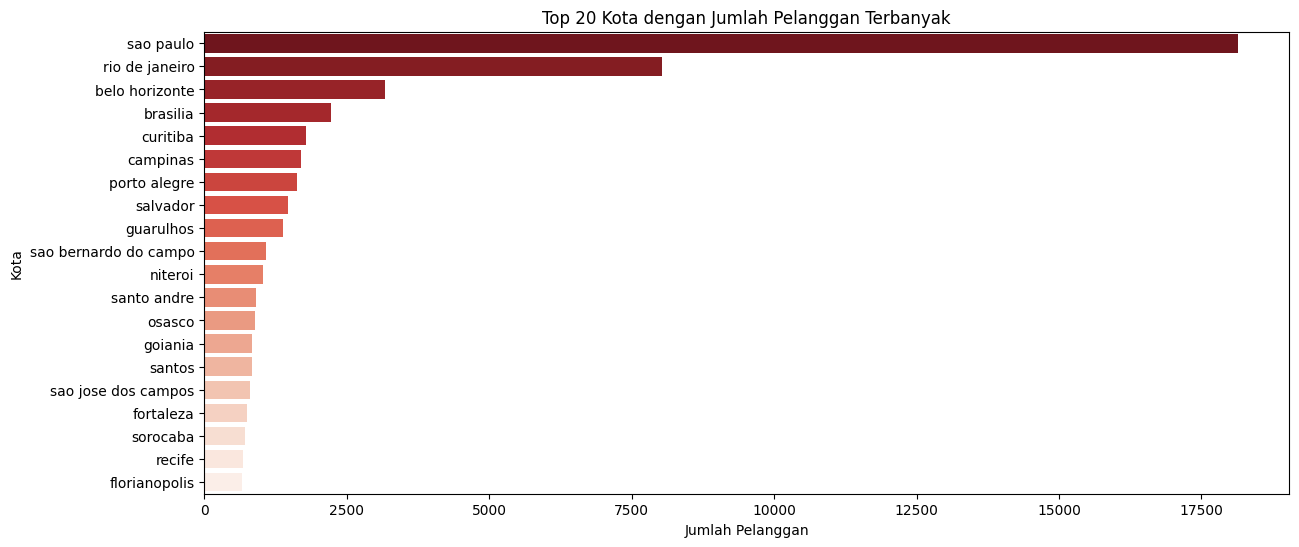

In [ ]:
city_counts = all_df.groupby("customer_city").size().reset_index(name="customer_count")

top_cities = city_counts.sort_values(by="customer_count", ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(y="customer_city", x="customer_count", data=top_cities, palette="Reds_r")

plt.title("Top 20 Kota dengan Jumlah Pelanggan Terbanyak")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.show()


### Pertanyaan 2: Bagaimana Tren jumlah pesanan dari waktu ke waktu?

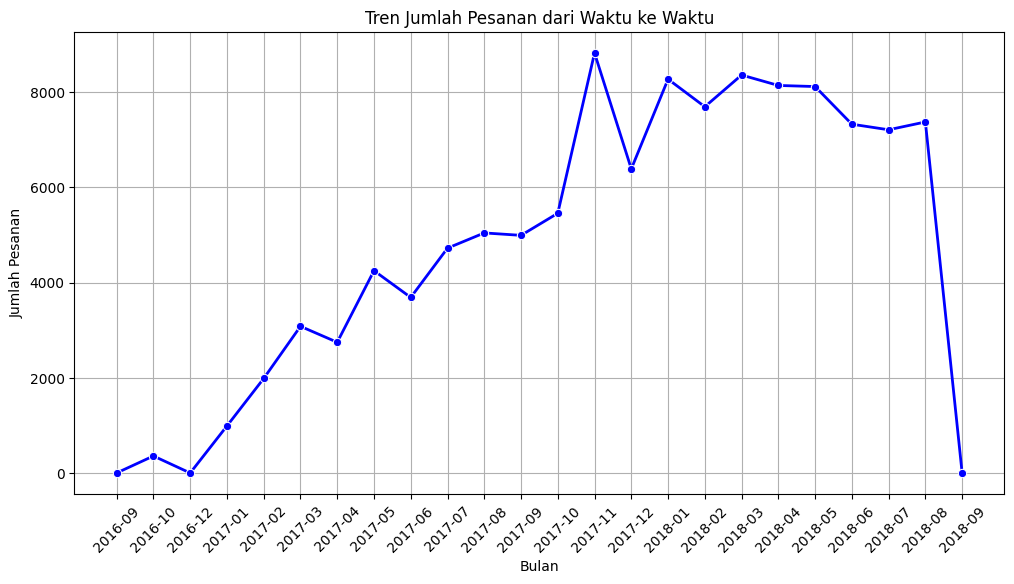

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['year_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

orders_by_month = all_df.groupby('year_month').size().reset_index(name='order_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_by_month, x=orders_by_month['year_month'].astype(str), y='order_count', marker="o", linewidth=2, color="blue")

plt.xticks(rotation=45)
plt.title("Tren Jumlah Pesanan dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid(True)

plt.show()


### Pertanyaan 3: Bagaimana Tren jumlah pesanan dari waktu ke waktu berdasarkan 5 kota dengan pesanan terbesar


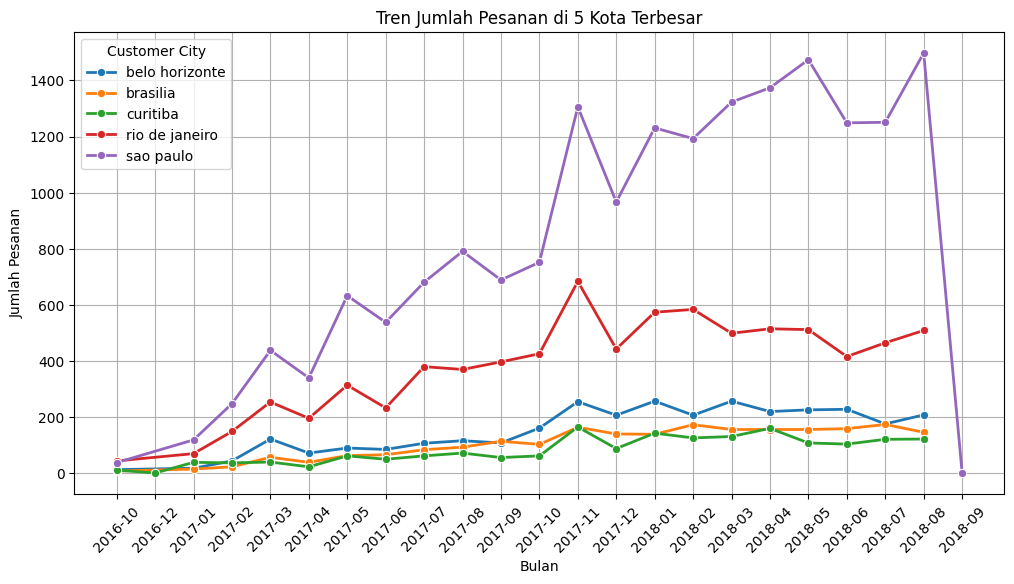

In [ ]:
city_order_counts = all_df.groupby("customer_city").size().reset_index(name="order_count")

top_5_cities = city_order_counts.nlargest(5, "order_count")["customer_city"].tolist()

top_cities_df = all_df[all_df["customer_city"].isin(top_5_cities)].copy()

top_cities_df["year_month"] = top_cities_df["order_purchase_timestamp"].dt.to_period("M")

orders_by_city_month = top_cities_df.groupby(["year_month", "customer_city"]).size().reset_index(name="order_count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_by_city_month, x=orders_by_city_month["year_month"].astype(str), y="order_count", hue="customer_city", marker="o", linewidth=2)

plt.xticks(rotation=45)
plt.title("Tren Jumlah Pesanan di 5 Kota Terbesar")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.legend(title="Customer City")
plt.grid(True)

plt.show()


### Pertanyaan 4: Bagaimana Tren Revenue dari Waktu ke Waktu dan dari 5 kota terbesar?

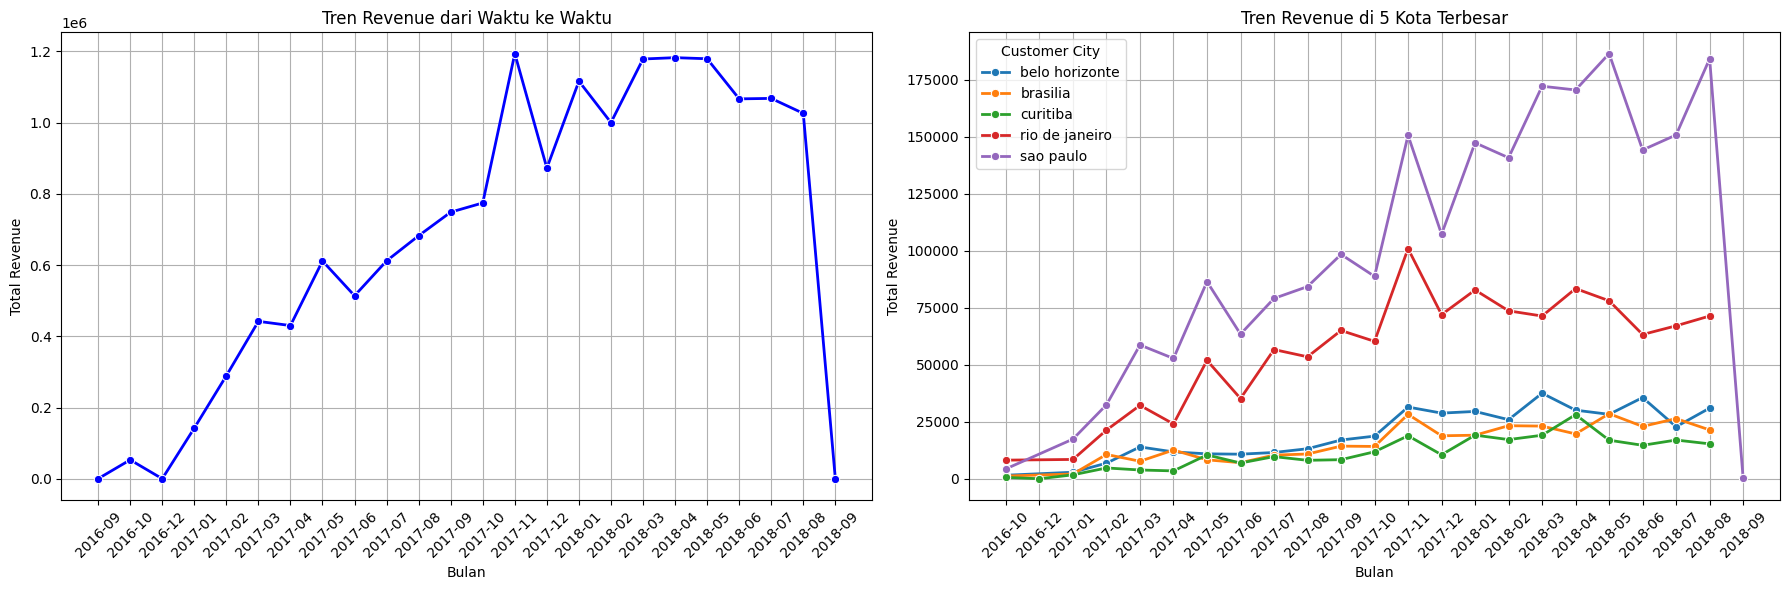

In [ ]:
revenue_by_month = all_df.groupby('year_month')[['price', 'freight_value']].sum()
revenue_by_month['total_revenue'] = revenue_by_month['price'] + revenue_by_month['freight_value']

city_revenue = all_df.groupby("customer_city")[["price", "freight_value"]].sum()
city_revenue["total_revenue"] = city_revenue["price"] + city_revenue["freight_value"]

top_5_cities = city_revenue.nlargest(5, "total_revenue").index.tolist()

top_cities_df = all_df[all_df["customer_city"].isin(top_5_cities)].copy()

top_cities_df["year_month"] = top_cities_df["order_purchase_timestamp"].dt.to_period("M")
revenue_by_city_month = top_cities_df.groupby(["year_month", "customer_city"])[["price", "freight_value"]].sum()
revenue_by_city_month["total_revenue"] = revenue_by_city_month["price"] + revenue_by_city_month["freight_value"]
revenue_by_city_month = revenue_by_city_month.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(ax=axes[0], data=revenue_by_month, x=revenue_by_month.index.astype(str), y='total_revenue', marker="o", linewidth=2, color="blue")
axes[0].set_title("Tren Revenue dari Waktu ke Waktu")
axes[0].set_xlabel("Bulan")
axes[0].set_ylabel("Total Revenue")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

sns.lineplot(ax=axes[1], data=revenue_by_city_month, x=revenue_by_city_month["year_month"].astype(str), y="total_revenue", hue="customer_city", marker="o", linewidth=2)
axes[1].set_title("Tren Revenue di 5 Kota Terbesar")
axes[1].set_xlabel("Bulan")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend(title="Customer City")

plt.tight_layout()
plt.show()


### Pertanyaan 5: Metode apa yang sering digunakan pelanggan?

<ipython-input-89-8733fa9c632f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_methods, x="count", y="payment_type", palette="coolwarm")


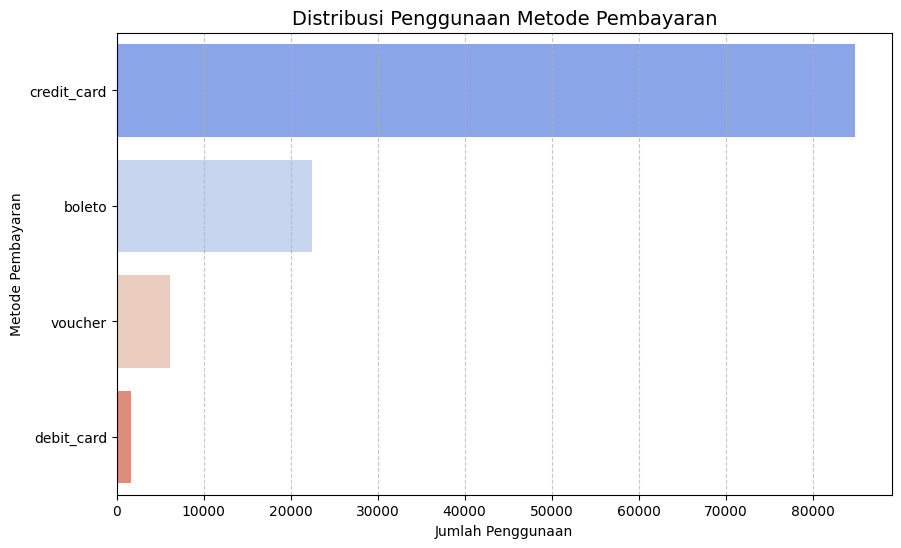

In [ ]:
payment_methods = all_df.groupby("payment_type")["order_id"].count().reset_index()
payment_methods.rename(columns={"order_id": "count"}, inplace=True)
payment_methods = payment_methods.sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_methods, x="count", y="payment_type", palette="coolwarm")
plt.title("Distribusi Penggunaan Metode Pembayaran", fontsize=14)
plt.xlabel("Jumlah Penggunaan")
plt.ylabel("Metode Pembayaran")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### Pertanyaan 6: Bagaimana distribusi total revenue berdasarkan kategori produk?

<ipython-input-90-c3d66d01a365>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue.head(15), x="total_revenue", y="product_category_name", palette="viridis")


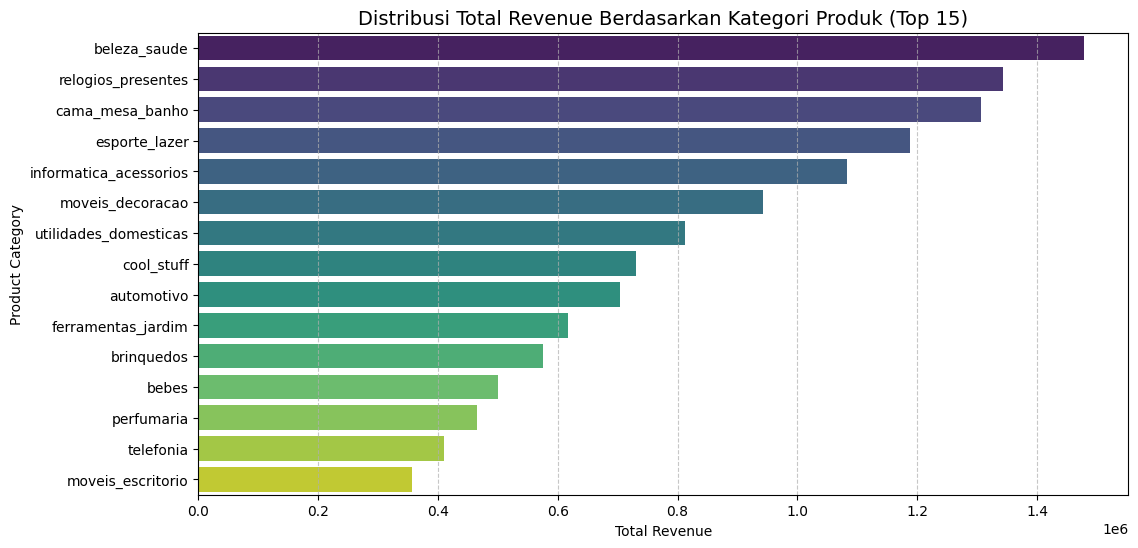

In [ ]:
category_revenue = all_df.groupby("product_category_name")[["price", "freight_value"]].sum()
category_revenue["total_revenue"] = category_revenue["price"] + category_revenue["freight_value"]
category_revenue = category_revenue.reset_index()

category_revenue = category_revenue.sort_values(by="total_revenue", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=category_revenue.head(15), x="total_revenue", y="product_category_name", palette="viridis")

plt.title("Distribusi Total Revenue Berdasarkan Kategori Produk (Top 15)", fontsize=14)
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


### Pertanyaan 7: Product atau kategori mana yang paling laku?

<ipython-input-91-eacf4c818c9d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(10), palette="Oranges_r", ax=ax[0])
<ipython-input-91-eacf4c818c9d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(10), palette="Oranges_r", ax=ax[1])


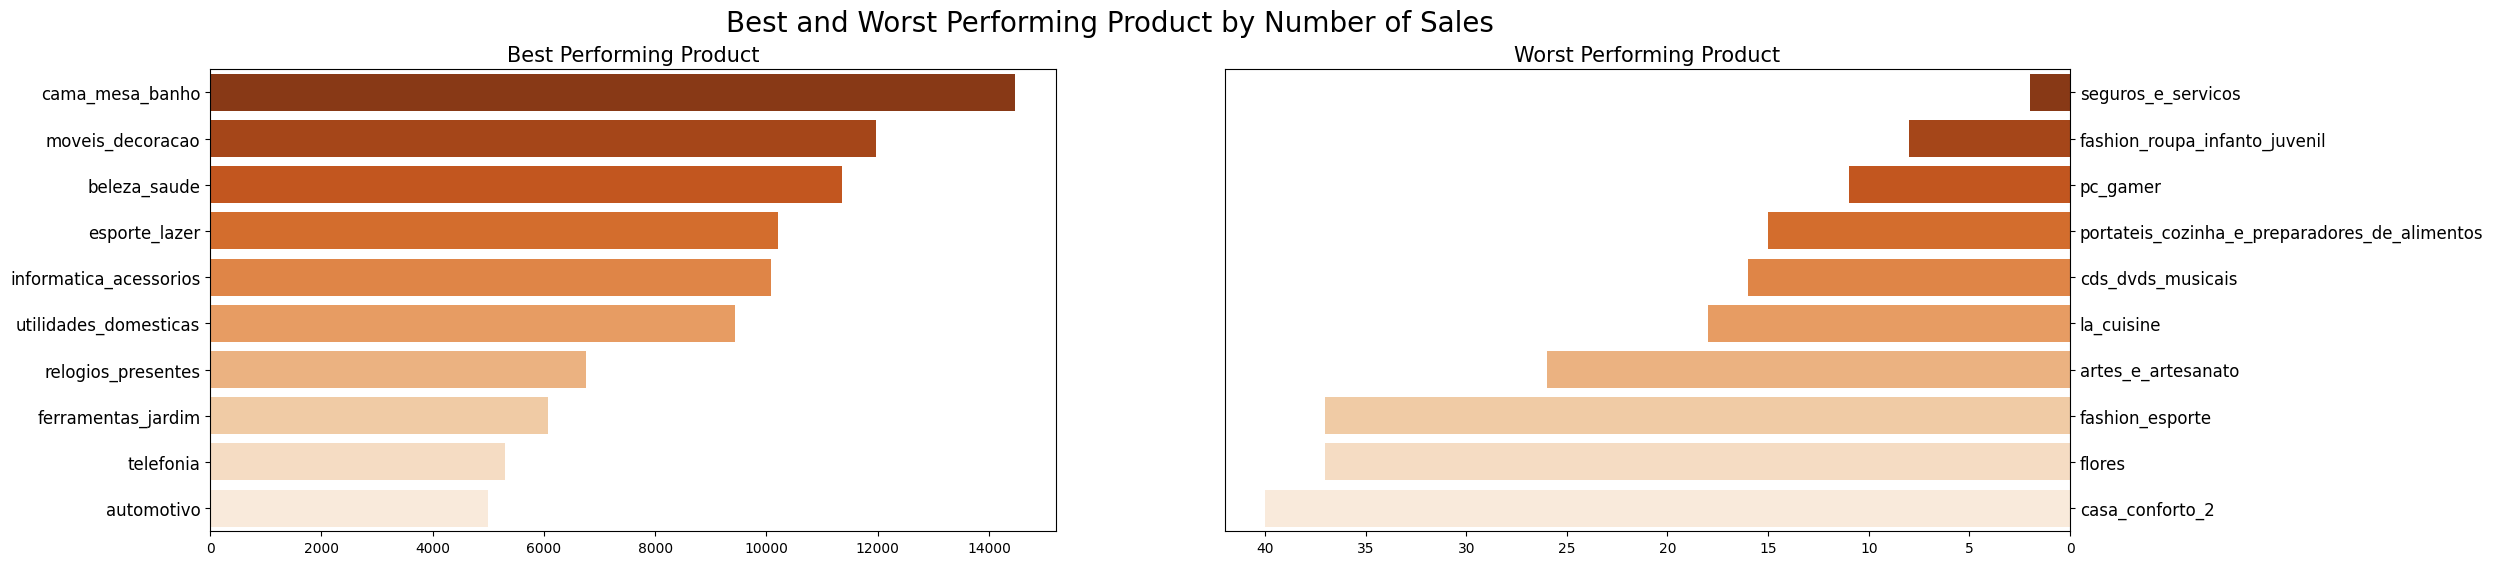

In [ ]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(10), palette="Oranges_r", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(10), palette="Oranges_r", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


### Pertanyaan 8: Bagaimana performa seller?

<ipython-input-96-f65c2bee2c4e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sellers_revenue, x="total_revenue", y="seller_id", palette="viridis", ax=axes[0])
<ipython-input-96-f65c2bee2c4e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sellers_orders, x="total_orders", y="seller_id", palette="magma", ax=axes[1])


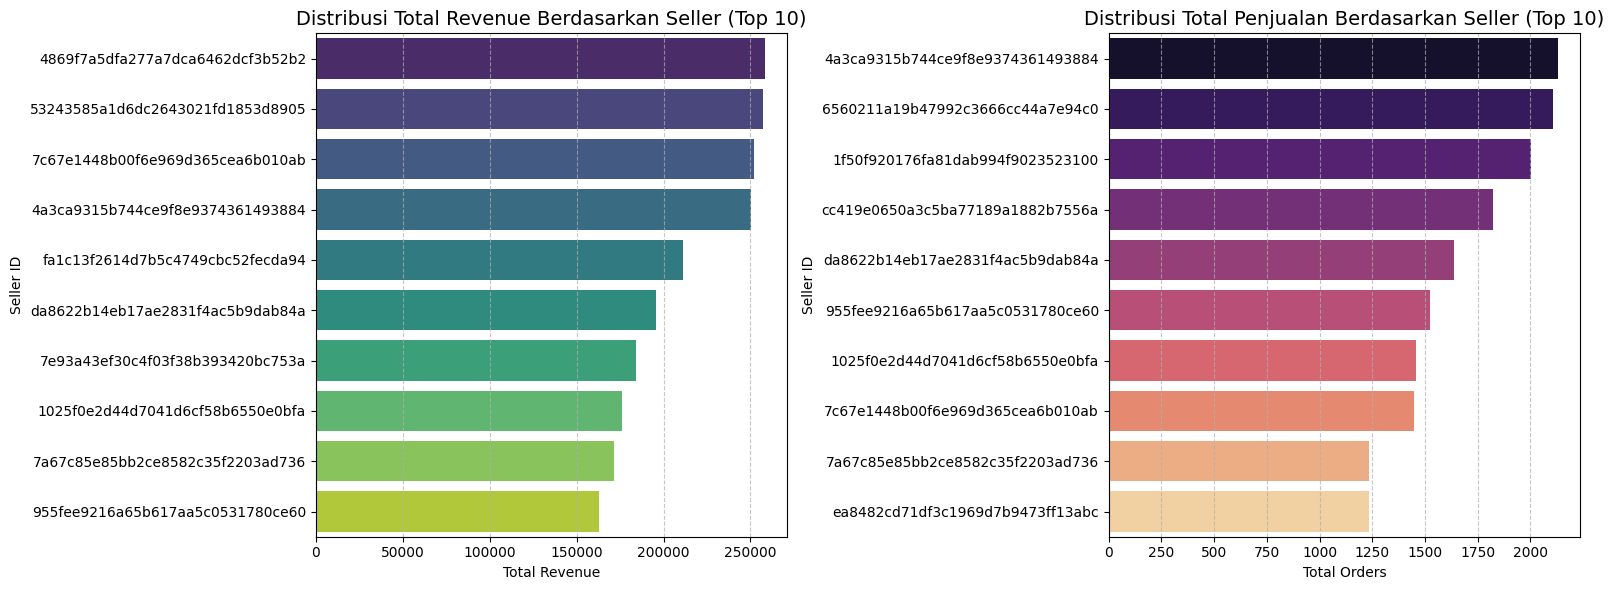

In [ ]:
seller_revenue = all_df.groupby("seller_id")[["price", "freight_value"]].sum()
seller_revenue["total_revenue"] = seller_revenue["price"] + seller_revenue["freight_value"]
seller_revenue = seller_revenue.reset_index()

seller_orders = all_df.groupby("seller_id")["order_id"].count().reset_index()
seller_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

seller_stats = seller_revenue.merge(seller_orders, on="seller_id")

top_sellers_revenue = seller_stats.sort_values(by="total_revenue", ascending=False).head(10)
top_sellers_orders = seller_stats.sort_values(by="total_orders", ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=top_sellers_revenue, x="total_revenue", y="seller_id", palette="viridis", ax=axes[0])
axes[0].set_title("Distribusi Total Revenue Berdasarkan Seller (Top 10)", fontsize=14)
axes[0].set_xlabel("Total Revenue")
axes[0].set_ylabel("Seller ID")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)

sns.barplot(data=top_sellers_orders, x="total_orders", y="seller_id", palette="magma", ax=axes[1])
axes[1].set_title("Distribusi Total Penjualan Berdasarkan Seller (Top 10)", fontsize=14)
axes[1].set_xlabel("Total Orders")
axes[1].set_ylabel("Seller ID")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


## Analisis RFM

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


<ipython-input-100-653f1bda2faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-100-653f1bda2faf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-100-653f1bda2faf>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

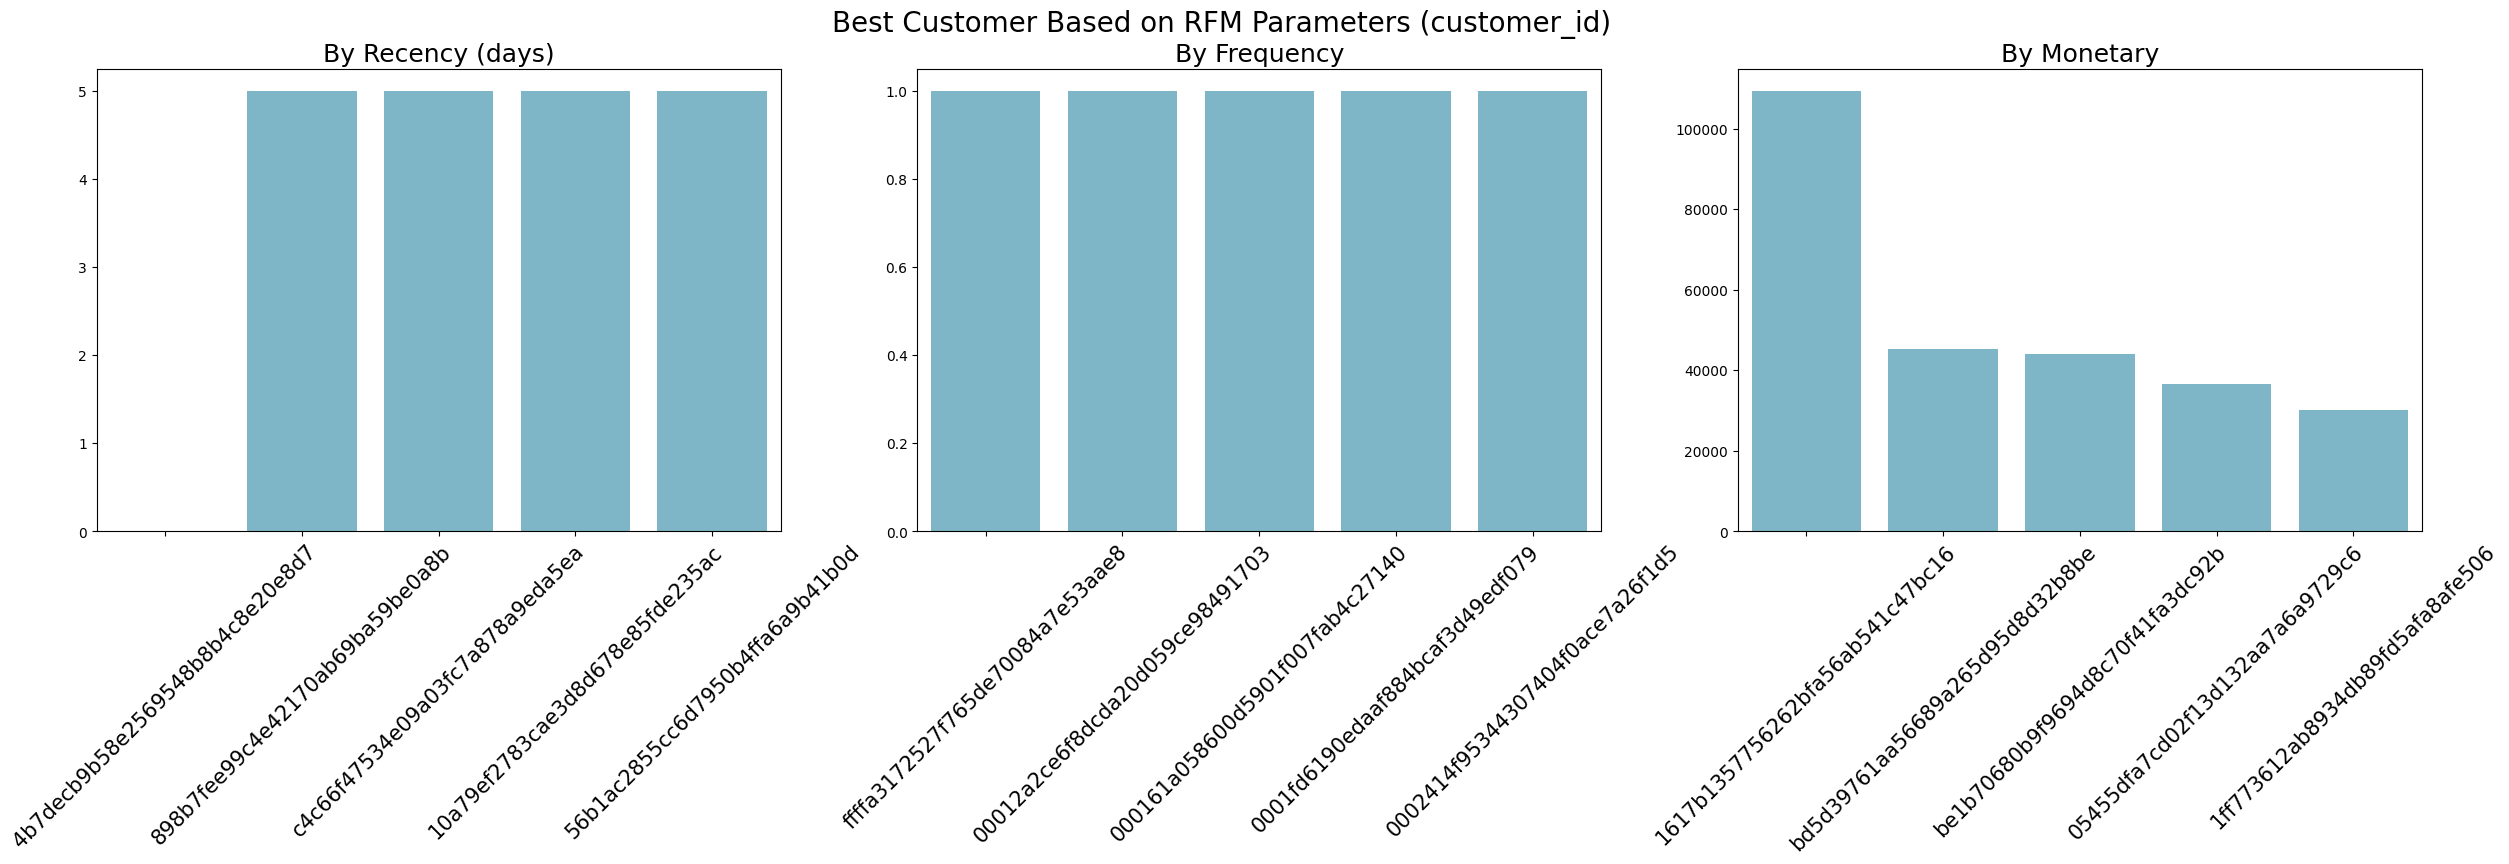

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='x', rotation=45)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


**Insight:**
- Pelanggan dengan nilai recency terendah adalah pelanggan yang baru saja melakukan transaksi terakhir, sehingga mereka dianggap masih aktif dan terlibat.

- 5 pelanggan dengan recency terendah merupakan kandidat pelanggan paling aktif yang kemungkinan besar merespons dengan baik terhadap promosi atau program loyalitas.

- Pelanggan dengan frequency tertinggi adalah pelanggan yang melakukan transaksi paling sering.

- Hal ini menunjukkan adanya loyalitas yang tinggi. Pelanggan ini bisa dianggap sebagai core customer dan sangat penting untuk dijaga agar tetap loyal, misalnya dengan program penghargaan atau personalisasi penawaran

- Pelanggan dengan nilai monetary tertinggi merupakan pelanggan dengan kontribusi pendapatan tertinggi bagi bisnis.

- Mereka berpotensi sebagai high-value customer dan sangat strategis untuk diberikan perhatian khusus, seperti penawaran eksklusif, early access ke produk baru, atau customer support prioritas.

## Conclusion

- Conclution pertanyaan 1: Didapat histogram Top 20 kota dengan distribusi customer terbanyak.
- Conclution pertanyaan 2: Didapat tren order dari waktu ke waktu
- Conclution pertanyaan 3: Didapat tren order dari waktu ke waktu berdasarkan 5 kota terbesar
- Conclution pertanyaan 4: Didapat tren revenue dari waktu ke waktu berdasarkan 5 kota terbesar.
- Conclution pertanyaan 5: Didapat histogram distribusi payment tyoe favorit
- Conlution pertanyaan 6: Didapat histogram distribusi penjualan produk berdasarkan 15 kategori produk teratas.
- Conclution pertanyaan 7: didapat histogram produk paling laku dan tidak laku
- Conclution pertanyaan 8: Didapat histogram performa seller terbaik